In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.figure_factory as ff
from scipy.stats import *
from sklearn.metrics import mean_squared_error, r2_score
np.set_printoptions(precision=5,suppress=True)

In [2]:
# Индекс PASI - Psoriasis Area and Severity Index
# Na-Li - natrium - lithium
# PTH - Partial thromboplastin time
n = 4
df0 = pd.read_csv('Insult1.csv', sep = ';')
df0.rename(columns = {'lagtime':'Lag'}, inplace = True)
df0


,Retrak,Lag,AreaCurve,Velocity,FI,FII
0,11.104270,10,1132.7740,0.060004,3,2
1,22.995120,15,994.7386,0.059845,2,4
2,25.006680,30,967.2681,0.050707,2,3
3,47.346690,30,801.8105,0.058047,1,3
4,17.990000,45,1059.0000,0.041540,1,4
5,23.153600,45,1495.0000,0.034704,1,4
6,27.066500,60,1013.0120,0.067466,1,4
7,50.604610,60,977.6036,0.092005,3,4
8,21.640000,75,1017.2700,0.022890,2,4
9,29.242300,75,961.0218,0.065492,3,4


In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Cufflinks wrapper on plotly
import cufflinks
from plotly.offline import iplot 

In [4]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Scatter(
        x=df0.index,
        y=df0["Retrak"],
        name = 'Retrak'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df0.index,
        y=df0["Lag"],
        name = 'Lag'),
    row=2, col=1
)


fig.add_trace(
    go.Scatter(
        x=df0.index,
        y=df0["AreaCurve"],
        name = 'Area Curve'),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=df0.index,
        y=df0["Velocity"],
        name = 'Velocity'),
    row=2, col=2
)

fig.update_layout(title_text="Plots of all features")
fig.show()

#### General describe

In [5]:
df = df0.drop(columns = ['FI', 'FII'])
dfMean = df.mean()
dfVar = df.var()
df.describe()

,Retrak,Lag,AreaCurve,Velocity
count,85.000000,85.000000,85.000000,85.000000
mean,23.107975,245.588235,1053.411868,0.046640
std,8.030894,155.663732,75.189711,0.018748
min,7.767412,10.000000,801.810500,0.005640
25%,18.229310,135.000000,1013.012000,0.032079
50%,21.418870,225.000000,1056.718000,0.048531
75%,26.691420,330.000000,1088.034000,0.060080
max,50.604610,750.000000,1495.000000,0.093977


In [6]:
Col = {0: 'Retrak', 1: 'Lag', 2: 'AreaCurve', 3: 'Velocity'}

Cov = []
for i in range(0, n):
    row = []
    for j in range(0, i):
        row.append(Cov[j][i])
    for j in range(i, n):
        row.append((df.iloc[:, j]*df.iloc[:, i]).mean() - df.iloc[:, i].mean()*df.iloc[:, j].mean()) #смещенная оценка
        
    Cov.append(row)

dfCov = pd.DataFrame(Cov)
dfCov.rename(Col, axis='columns', inplace = True)
dfCov.rename(Col, axis='rows', inplace = True)

dfCov

,Retrak,Lag,AreaCurve,Velocity
Retrak,63.736488,-629.744240,-409.893187,0.095592
Lag,-629.744240,23946.124567,4963.035260,-1.185316
AreaCurve,-409.893187,4963.035260,5586.980957,-0.647511
Velocity,0.095592,-1.185316,-0.647511,0.000347


In [7]:
#Вручную
Corr = []
for i in range(0, n):
    row = []
    for j in range(0, n):
        row.append(Cov[i][j]/(Cov[i][i]*Cov[j][j])**(1/2))
    Corr.append(row)

dfCorr = pd.DataFrame(Corr)
dfCorr.rename(Col, axis='columns', inplace = True)
dfCorr.rename(Col, axis='rows', inplace = True)

dfCorr

,Retrak,Lag,AreaCurve,Velocity
Retrak,1.000000,-0.509744,-0.686891,0.642453
Lag,-0.509744,1.000000,0.429083,-0.410991
AreaCurve,-0.686891,0.429083,1.000000,-0.464808
Velocity,0.642453,-0.410991,-0.464808,1.000000


In [8]:
corrs = df.corr()

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)

iplot(figure)

In [9]:
detCov = np.linalg.det(Cov)

InCov = []
for i in range (0, n):
    row = []
    for j in range(0, n):
        buf = []
        for k in range(0,n):
            if k==i:
                continue
            buf_row = Cov[k].copy()
            buf_row.pop(j)
            buf.append(buf_row)
        row.append(1/detCov*(-1)**(i+j)*np.linalg.det(buf))
    InCov.append(row)

dfInCov = pd.DataFrame(InCov)
dfInCov.rename(Col, axis='columns', inplace = True)
dfInCov.rename(Col, axis='rows', inplace = True)
dfInCov

,Retrak,Lag,AreaCurve,Velocity
Retrak,0.042015,0.000365,0.001993,-6.601445
Lag,0.000365,0.000058,-0.000017,0.065946
AreaCurve,0.001993,-0.000017,0.000345,0.034937
Velocity,-6.601445,0.065946,0.034937,4985.816143


In [10]:
detCorr = np.linalg.det(Corr)
InCorr = []
for i in range (0, n):
    row = []
    for j in range(0, n):
        buf = []
        for k in range(0,n):
            if k==i:
                continue
            buf_row = Corr[k].copy()
            buf_row.pop(j)
            buf.append(buf_row)
        row.append(1/detCorr*(-1)**(i+j)*np.linalg.det(buf))
    InCorr.append(row)

dfInCorr = pd.DataFrame(InCorr)
dfInCorr.rename(Col, axis='columns', inplace = True)
dfInCorr.rename(Col, axis='rows', inplace = True)
dfInCorr

,Retrak,Lag,AreaCurve,Velocity
Retrak,2.677904,0.451026,1.189348,-0.982240
Lag,0.451026,1.393832,-0.199861,0.190192
AreaCurve,1.189348,-0.199861,1.925331,0.048669
Velocity,-0.982240,0.190192,0.048669,1.731832


#### Linear regression

In [11]:
from sklearn.linear_model import LinearRegression as LR
X = np.matrix(df[['Lag', 'AreaCurve', 'Velocity']])
Y = np.array(df['Retrak'])

LR = LR().fit(X, Y) # Initial Linear model
print('Linear regression coefficients: ', LR.coef_)
print("Mean squared error: %.2f" % mean_squared_error(df['Retrak'], LR.predict(X)))
print('Variance score: %.2f' % r2_score(df['Retrak'], LR.predict(X)),'\n')

RemainVar = 1/InCov[0][0]
print("Remain variance - ",RemainVar)
print("Proportions of remain var and real var - ", RemainVar/dfVar[0])

Linear regression coefficients:  [ -0.00869  -0.04744 157.12024]
Mean squared error: 23.80
Variance score: 0.63 

Remain variance -  23.80088495981898
Proportions of remain var and real var -  0.3690331096842214


In [12]:
trace1 = go.Scatter(
    x= df.index,
    y= df['Retrak'],
    mode= 'lines+markers', 
    opacity = 0.9,
    name = 'Retrak')
trace2 = go.Scatter(
    x= df.index,
    y= LR.predict(X),
    mode= 'lines+markers', 
    opacity = 0.9,
    name = 'Regression')
py.iplot([trace1,trace2])

In [13]:
trace = go.Scatter(
    x= df['Retrak'],
    y= LR.predict(X),
    mode= 'markers+text', 
    opacity = 0.9,
    name = 'Regression')
py.iplot([trace])

#### Multiple and partial correlation

In [14]:
MultiCorr = np.zeros(n)
for i in range(n):
    MultiCorr[i] = np.sqrt(1-1/dfInCorr.iloc[i,i])
print('Multiple correlation: ', MultiCorr)

Multiple correlation:  [0.79156 0.53156 0.69326 0.65006]


In [15]:
#Вручную
PartCorr = []
for i in range(0, n):
    row = []
    for j in range(0, i):
        row.append(InCorr[j][i])
    for j in range(i, n):
        row.append((-1)*InCov[i][j]/((InCov[i][i]*InCov[j][j])**(1/2))) #смещенная оценка
        
    PartCorr.append(row)

dfPCorr = pd.DataFrame(PartCorr)
dfPCorr.rename(Col, axis='columns', inplace = True)
dfPCorr.rename(Col, axis='rows', inplace = True)

print('Partial correlation: \n', dfPCorr ,'\n\n', 'Correlation: \n',dfCorr,'\n')
print('False correlation between \'Velocity\' and \'Area Curve\', also \'Lag\' and others')
print('No hidden correlation')

Partial correlation: 
              Retrak       Lag  AreaCurve  Velocity
Retrak    -1.000000 -0.233453  -0.523792  0.456108
Lag        0.451026 -1.000000   0.122003 -0.122415
AreaCurve  1.189348 -0.199861  -1.000000 -0.026653
Velocity  -0.982240  0.190192   0.048669 -1.000000 

 Correlation: 
              Retrak       Lag  AreaCurve  Velocity
Retrak     1.000000 -0.509744  -0.686891  0.642453
Lag       -0.509744  1.000000   0.429083 -0.410991
AreaCurve -0.686891  0.429083   1.000000 -0.464808
Velocity   0.642453 -0.410991  -0.464808  1.000000 

False correlation between 'Velocity' and 'Area Curve', also 'Lag' and others
No hidden correlation


#### Principal components analys

In [16]:
# Manual method

from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df.values
# Standardizing the features
St_x = StandardScaler().fit_transform(x)
eig_vals, eig_vecs = np.linalg.eig(np.corrcoef(St_x.T))
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.55819  0.80198  0.19839 -0.07674]
 [ 0.44224  0.08096  0.89062 -0.06822]
 [ 0.50434  0.47577 -0.24168  0.67888]
 [-0.48835 -0.35201  0.33018  0.72704]]

Eigenvalues 
[2.58655 0.25906 0.61765 0.53674]


In [17]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i)

Eigenvalues in descending order:
(2.586554413386874, array([-0.55819,  0.44224,  0.50434, -0.48835]))
(0.6176481137905315, array([ 0.19839,  0.89062, -0.24168,  0.33018]))
(0.5367394021444196, array([-0.07674, -0.06822,  0.67888,  0.72704]))
(0.2590580706781758, array([ 0.80198,  0.08096,  0.47577, -0.35201]))


In [18]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='selecting-principal-components')

In [19]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)
Y = St_x.dot(matrix_w)

data = []

y = df0.iloc[:,4].values
colors = {1: '#0D76BF', 
          2: '#00cc96', 
          3: '#EF553B'}

for name, col in zip((1, 2, 3), colors.values()):
    trace = dict(
        type='scatter',
        x=Y[y==name,0],
        y=Y[y==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)
layout = dict(
    showlegend=True,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2')
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

Matrix W:
 [[-0.55819  0.19839]
 [ 0.44224  0.89062]
 [ 0.50434 -0.24168]
 [-0.48835  0.33018]]


In [20]:
import plotly.express as px

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1), 
                      eig_pairs[2][1].reshape(4,1)))

Y = St_x.dot(matrix_w)
print(Y[:5])

data = []

y = df0.iloc[:,4].values
colors = {1: '#0D76BF', 
          2: '#00cc96', 
          3: '#EF553B'}


trace1 = go.Scatter3d(
    x=Y[y==1,0],
    y=Y[y==1,1],
    z=Y[y==1,2],
    name = 'Group 1',
    mode='markers', 
    marker={'size': 8, 'color': '#0D76BF', 'colorscale': 'Blackbody', 'opacity': 0.8, "showscale": True,
                                "colorbar": {"thickness": 15, "len": 0.5, "x": 0.8, "y": 0.6, }, })
trace2 = go.Scatter3d(
    x=Y[y==2,0],
    y=Y[y==2,1],
    z=Y[y==2,2],
    name = 'Group 2',
    mode='markers', 
    marker={'size': 8, 'color': '#00cc96', 'colorscale': 'Blackbody', 'opacity': 0.8, "showscale": True,
                                "colorbar": {"thickness": 15, "len": 0.5, "x": 0.8, "y": 0.6, }, })

trace3 = go.Scatter3d(
    x=Y[y==3,0],
    y=Y[y==3,1],
    z=Y[y==3,2],
    name = 'Group 3',
    mode='markers', 
    marker={'size': 8, 'color': '#EF553B', 'colorscale': 'Blackbody', 'opacity': 0.8, "showscale": True,
                                "colorbar": {"thickness": 15, "len": 0.5, "x": 0.8, "y": 0.6, }, })
py.iplot([trace1,trace2, trace3])


[[ 0.35131 -1.67405  1.46136]
 [-1.393   -0.90629  0.08496]
 [-1.43667 -0.84304 -0.54697]
 [-4.30737  0.37713 -1.97813]
 [-0.04407 -1.39008 -0.01059]]


In [21]:
# Embeded method

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(St_x)
Y = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])
Y.head()

,PC 1,PC 2
0,-0.351306,1.674053
1,1.392995,0.906285
2,1.436674,0.843041
3,4.307373,-0.377133
4,0.044073,1.390077


In [22]:
pca.explained_variance_ratio_

array([0.64664, 0.15441])

### Каноническая корреляция

In [23]:
from sklearn.cross_decomposition import CCA
n_components = 2
cca = CCA(n_components)
cca.fit(df.loc[:, ['Retrak','AreaCurve']],
        df.loc[:, ['Lag','Velocity']] )
U, V = cca.transform(df.loc[:, ['Retrak','AreaCurve']],
                     df.loc[:, ['Lag','Velocity']] )
for i in range(n_components):
    print(np.corrcoef(U[:,i], V[:,i])[0,1])

0.7002835402510506
0.0834799442450048


In [24]:
bufMtrx1 = np.linalg.inv([row[0:3:2] for row in Cov[0:3:2]])
bufMtrx2 = [row[1:4:2] for row in Cov[0:3:2]]
bufMtrx3 = np.linalg.inv([row[1:4:2] for row in Cov[1:4:2]])
bufMtrx4 = [row[0:3:2] for row in Cov[1:4:2]]
bufMtrx = np.matmul(np.matmul(np.matmul(bufMtrx1, bufMtrx2), bufMtrx3),bufMtrx4)
Eigen = np.linalg.eig(bufMtrx)
r1 = Eigen[0][0]**(1/2)
r2 = Eigen[0][1]**(1/2)
print("r1 =", r1, "\nr2 =", r2)

r1 = 0.7002835402510854 
r2 = 0.08347994424498738


In [25]:
print(Eigen[1][0]/1.6369)
print(np.matmul(np.matmul(bufMtrx3, bufMtrx4),Eigen[1][0]/1.6369)/r1)

[0.61083 0.60499]
[    0.10622 -1007.93031]


In [26]:
# print(np.matmul(np.matmul(Eigen[1][0], [row[0:3:2] for row in Cov[0:3:2]]), [[Eigen[1][0][0]],[Eigen[1][0][1]]))

### Дискриминантный анализ

In [27]:
J = 3
p =4
n = len(df)
df1 = (df0.drop(columns = ['FII'])[df0['FI']==1]).drop(columns = ['FI'])
df2 = (df0.drop(columns = ['FII'])[df0['FI']==2]).drop(columns = ['FI'])
df3 = (df0.drop(columns = ['FII'])[df0['FI']==3]).drop(columns = ['FI'])
nj =  [len(df1),len(df2), len(df3)]

In [30]:
print('n1 =' , nj[0])
print('n2 =' , nj[1])
print('n3 =' , nj[2])
print('n =' , n)
Mean = pd.DataFrame([df1.mean(),df2.mean(),df3.mean(),df.mean()])
Mean = Mean.rename(index = {0:'FI = 1',1:'FI = 2',2:'FI = 3',3:'Total'})
Mean

n1 = 19
n2 = 12
n3 = 54
n = 85


,Retrak,Lag,AreaCurve,Velocity
FI = 1,24.643352,207.631579,1054.491332,0.047304
FI = 2,23.166579,212.500000,1035.602642,0.047625
FI = 3,22.554727,266.296296,1056.989663,0.046188
Total,23.107975,245.588235,1053.411868,0.046640


In [31]:
# Python pandas cov use unbiased N-1 normalization
x = np.array(df1)
x = (x-x.mean(axis = 0))
print(np.dot(x.T,x)/(nj[0]-1))

L1 = df1.cov()
L1 

[[   62.96798  -507.87147  -545.44159     0.04932]
 [ -507.87147 30406.57895  2717.397      -0.79843]
 [ -545.44159  2717.397   16088.63864    -0.68916]
 [    0.04932    -0.79843    -0.68916     0.0002 ]]


,Retrak,Lag,AreaCurve,Velocity
Retrak,62.967983,-507.871471,-545.441594,0.049325
Lag,-507.871471,30406.578947,2717.396996,-0.798428
AreaCurve,-545.441594,2717.396996,16088.638639,-0.689163
Velocity,0.049325,-0.798428,-0.689163,0.000197


In [32]:
Lj = []
x = np.array(df1)
x = (x-x.mean(axis = 0))
Lj.append(np.dot(x.T,x)/(nj[0]))

x = np.array(df2)
x = (x-x.mean(axis = 0))
Lj.append(np.dot(x.T,x)/(nj[1]))

x = np.array(df3)
x = (x-x.mean(axis = 0))
Lj.append(np.dot(x.T,x)/(nj[2]))

L = pd.DataFrame((Lj[0]*nj[0]+Lj[1]*nj[1]+Lj[2]*nj[2])/(n-J))
L = L.rename(columns = {0:'Retrak',1:'Lag',2:'AreaCurve',3:'Velocity'}, 
             index = {0:'Retrak',1:'Lag',2:'AreaCurve',3:'Velocity'})
L

,Retrak,Lag,AreaCurve,Velocity
Retrak,65.320019,-631.451852,-423.817058,0.098680
Lag,-631.451852,24045.764394,5019.077485,-1.211911
AreaCurve,-423.817058,5019.077485,5736.268121,-0.667735
Velocity,0.098680,-1.211911,-0.667735,0.000360


In [78]:
C = 1
Q = np.zeros((4,4))
for j in range(J):
    x = np.array(Mean.iloc[j]-Mean.iloc[J])
    Q += np.dot(x.reshape(4,1), x.reshape(1,4))*nj[j]
T2 = C*np.trace(np.dot(Q, np.linalg.inv(L)))


In [80]:
np.linalg.inv(L)

array([[   0.0414,    0.0003,    0.002 ,   -6.4921],
       [   0.0003,    0.0001,   -0.    ,    0.0683],
       [   0.002 ,   -0.    ,    0.0003,    0.0234],
       [  -6.4921,    0.0683,    0.0234, 4834.961 ]])

In [34]:
if (n-(J-1)*p-2)>0:
    g1 = p*(J-1)*(n-J-p)/(n-J-p-(J-2)*(p-1))
    g2 = n-J-p+1
#else check Simushkin book :)
print('p-value:', 1- f.cdf(T2,g1,g2))

p-value: 1.716266502793662e-05


In [76]:
lamb = np.linalg.eig(np.dot(Q, np.linalg.inv(L)))
lamb

(array([3.346 +0.j, 2.0123+0.j, 0.    +0.j, 0.    -0.j]),
 array([[-0.0361+0.j    ,  0.0029+0.j    , -0.0928-0.0068j,
         -0.0928+0.0068j],
        [ 0.9987+0.j    , -0.8888+0.j    , -0.2533+0.1572j,
         -0.2533-0.1572j],
        [ 0.0349+0.j    , -0.4583+0.j    ,  0.95  +0.j    ,
          0.95  -0.j    ],
        [-0.    +0.j    ,  0.    +0.j    , -0.    -0.0001j,
         -0.    +0.0001j]]))

In [77]:
Wilks = 1
for i in range(J):
    Wilks *= 1/(1+lamb[0][i])
Wilks

(0.07638486724100699-1.1002567922105545e-17j)

In [37]:
Asimptotic_Wilks = -(n-(n+J+2)/2)*np.log(Wilks)
Asimptotic_Wilks

(102.87882700761403+5.761647991029746e-15j)

In [38]:
print('p-value:',1-chi2.cdf(Asimptotic_Wilks.real,  p*(J-1)))

p-value: 0.0


In [39]:
p_val_pair = []
buf = (n-J-p-1)/(p*(n-J))*g2/(g2-2) #Should I change J?
T2_pair = buf*nj[0]*nj[1]/(nj[0]+nj[1])*np.dot(np.array(Mean.iloc[0]-Mean.iloc[1]).reshape(1,4), 
                                         np.dot(np.linalg.inv(L), # L that we have already calculated, isn't it?
                                                np.array(Mean.iloc[0]-Mean.iloc[1])))
p_val_pair.append(1-f.cdf(T2_pair/(J-1),g1,g2))

T2_pair = buf*nj[0]*nj[2]/(nj[0]+nj[2])*np.dot(np.array(Mean.iloc[0]-Mean.iloc[2]).reshape(1,4), 
                                         np.dot(np.linalg.inv(L), # L that we have already calculated, isn't it?
                                                np.array(Mean.iloc[0]-Mean.iloc[2])))
p_val_pair.append(1-f.cdf(T2_pair/(J-1),g1,g2))

T2_pair = buf*nj[2]*nj[1]/(nj[2]+nj[1])*np.dot(np.array(Mean.iloc[2]-Mean.iloc[1]).reshape(1,4), 
                                         np.dot(np.linalg.inv(L), # L that we have already calculated, isn't it?
                                                np.array(Mean.iloc[2]-Mean.iloc[1])))
p_val_pair.append(1-f.cdf(T2_pair/(J-1),g1,g2))

In [40]:
p_val_pair # nothing significant

[array([0.9696]), array([0.9207]), array([0.98205])]

### Source
https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

In [41]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [42]:
df = df0.copy()

In [43]:
class_feature_means = pd.DataFrame(columns=[1, 2, 3])
for c, rows in df.groupby('FI'):
    class_feature_means[c] = rows.mean()
class_feature_means =class_feature_means.drop(index = ['FI', 'FII'])
class_feature_means

,1,2,3
Retrak,24.643352,23.166579,22.554727
Lag,207.631579,212.500000,266.296296
AreaCurve,1054.491332,1035.602642,1056.989663
Velocity,0.047304,0.047625,0.046188


In [44]:
within_class_scatter_matrix = np.zeros((4,4))
for c, rows in df.groupby('FI'):
    rows = rows.drop(['FI', 'FII'], axis=1)
    s = np.zeros((4,4))
for index, row in rows.iterrows():
        x, mc = row.values.reshape(4,1), class_feature_means[c].values.reshape(4,1)
        
        s += (x - mc).dot((x - mc).T)
    
within_class_scatter_matrix += s
within_class_scatter_matrix

array([[   3722.5482,  -34336.9738,  -21330.0664,       6.0716],
       [ -34336.9738, 1090609.2593,  267339.8261,     -69.1938],
       [ -21330.0664,  267339.8261,  144511.2738,     -34.2948],
       [      6.0716,     -69.1938,     -34.2948,       0.0211]])

In [45]:
feature_means = df.drop( columns = ['FI', 'FII']).mean()
between_class_scatter_matrix = np.zeros((4,4))
for c in class_feature_means:    
    n = len(df.loc[df['FI'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(4,1), feature_means.values.reshape(4,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
between_class_scatter_matrix

array([[   61.36  , -1749.2085,   -87.9221,     0.0336],
       [-1749.2085, 63667.9079, 10293.6433,    -1.3752],
       [  -87.9221, 10293.6433,  4519.3954,    -0.2842],
       [    0.0336,    -1.3752,    -0.2842,     0.    ]])

In [46]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [47]:
eigen_values

array([ 0.3695,  0.0603, -0.    , -0.    ])

In [48]:
eig_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
eig_pairs = sorted(eig_pairs, key=lambda x: x[0], reverse=True)
for pair in eig_pairs:
    print(pair[0])

0.3695446051273833
0.060336919493882646
1.0331955200796916e-17
5.169310981362874e-19


In [49]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(eig_pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.8596429108065515
Eigenvector 1: 0.1403570891934485
Eigenvector 2: 2.4034424856708067e-17
Eigenvector 3: 1.202496661357368e-18


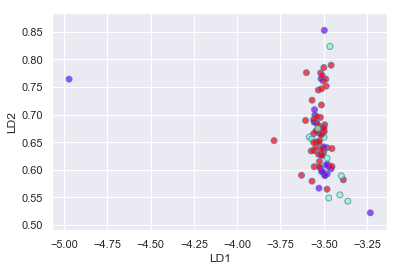

In [50]:
w_matrix = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))).real

X_lda = np.array(df0.drop(columns = ['FI', 'FII']).dot(w_matrix))
le = LabelEncoder()

y = le.fit_transform(df['FI'])
plt.xlabel('LD1')
plt.ylabel('LD2')

plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

array([0.8059, 0.1482])

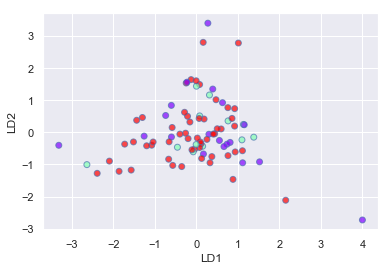

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(df.iloc[:,:4], df.iloc[:,5])

y = le.fit_transform(df['FI'])
plt.xlabel('LD1')
plt.ylabel('LD2')

plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
lda.explained_variance_ratio_

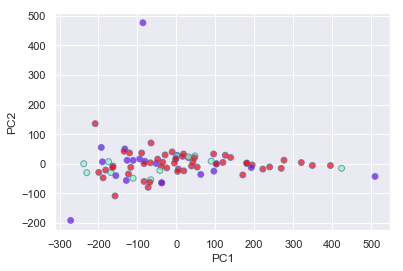

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.iloc[:,:4], df.iloc[:,5])
pca.explained_variance_ratio_

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)